In [53]:
import numpy as np
import matplotlib.pyplot as plt

Here is a function that takes list of integers as strings and combines them into one big number as a string

In [145]:
mytartan = 50258468%31
mytartan

28

In [2]:
# This function combines strings in a list into one big string
def comb_str(lizst): # Input is some list of lists containing ints as char
    c=""
# iterate over character lists
    for i in lizst:
    # combines each char in i to form a new string (1 + 4 = 14)    
        c += i
    return c
comb_str(['1', '4'])

'14'

Here is a function that takes a string with letters and integers, them splits them up into two lists. One list contains the letters while the other list contains the integers.

This function takes two lists and returns a list of tuples containing one element from one list and one element of the other list.

In [146]:
# This function will separate the characters by integers and letters into separate lists
def deconstruct_pattern(data): # Input is the color-width data in the form of a list
    data = data.split(" ")
    tups_list = []
# Iterates over each character in a string
    for i in data:
        if_let = []
        if_digit = []
        for strs in i:
    # If the character is a digit
            if strs.isdigit(): 
            # Add the digit to the ints list
                if_digit.append(strs)
        # If its not a digit, but a letter
            else:
                # Add that letter into the letters list
                if_let.append(strs)
        tups = (comb_str(if_let),int(comb_str(if_digit)) )
        tups_list.append(tups)
    return tups_list


deconstruct_pattern("K16 Y4 K32 Y48 R4 Y48 K32 Y4 K16")

[('K', 16),
 ('Y', 4),
 ('K', 32),
 ('Y', 48),
 ('R', 4),
 ('Y', 48),
 ('K', 32),
 ('Y', 4),
 ('K', 16)]

This function combines the previous functions to create a list of tuples for the color-width data.

In [147]:
deconstruct_pattern("K16 Y4 K32 Y48 R4 Y48 K32 Y4 K16")

[('K', 16),
 ('Y', 4),
 ('K', 32),
 ('Y', 48),
 ('R', 4),
 ('Y', 48),
 ('K', 32),
 ('Y', 4),
 ('K', 16)]

In [149]:
color_patt = {"K" : [16, 16, 16],
"R" : [200, 0, 0],
"Y" : [216, 176, 0]}

def fix_color(dicts):
    for i,j in dicts.items():
        l = []
        for k in j:
            k = k/255
            l.append(k)
            dicts.update({i:l})
    return dicts

fix_color(color_patt)

{'K': [0.06274509803921569, 0.06274509803921569, 0.06274509803921569],
 'R': [0.7843137254901961, 0.0, 0.0],
 'Y': [0.8470588235294118, 0.6901960784313725, 0.0]}

In [150]:
def make_stripe(pattern, width, height):
    array = np.ones((height, width, 3))
    for i,j in [(i,j) for i in range(height) for j in range(width)]:
        array[i,j,:] = (pattern[0], pattern[1], pattern[2])
    return array


In [25]:
def build_vert(pattern, color_dict, size):
    color_dict = fix_color(color_dict)
    patt = deconstruct_pattern(pattern)
    start = make_stripe(color_dict[patt[0][0]],patt[0][1],size)
    while np.shape(start)[1] < size: 
        for i in patt[1:]:
            strip = make_stripe(color_dict[i[0]],i[1],size)
            start = np.concatenate([start, strip], 1)
    plt.imshow(start)
    plt.show()
    print(np.shape(start))

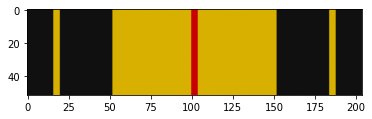

(52, 204, 3)


In [26]:
build_vert("K16 Y4 K32 Y48 R4 Y48 K32 Y4 K16",
{"K" : [16, 16, 16], "R" : [200, 0, 0], "Y" : [216, 176, 0]}
          , 52)